In [88]:
import numpy as np
from sklearn import cross_validation, datasets, metrics, neighbors 
from sklearn.model_selection import KFold, cross_val_score

In [25]:
dataset = datasets.make_classification(n_samples=100, n_features =2, n_informative = 2, 
                                       n_classes = 3, n_redundant=0, 
                                       n_clusters_per_class=1, random_state=3)

In [8]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

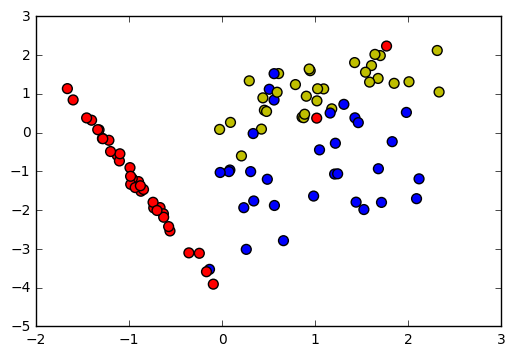

In [50]:
color_map = {0: 'r', 1: 'b', 2: 'y'}
colors = [color_map[c] for c in dataset[1]]
data = dataset[0]

plt.scatter(data[:, 0], data[:, 1], c=colors, s=50)

In [40]:
train_data, test_data, train_labels, test_labels = cross_validation.train_test_split(classification_problem[0], 
                                                                                     classification_problem[1], 
                                                                                     test_size = 0.3,
                                                                                     random_state = 1)

In [43]:
clf = neighbors.KNeighborsClassifier()
clf.fit(train_data, train_labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [44]:
predictions = clf.predict(test_data)
metrics.accuracy_score(test_labels, predictions)

0.76666666666666672

In [68]:
def get_meshgrid(data, step=.05, border=1.5):
    x_min, x_max = data[:, 0].min() - border, data[:, 0].max() + border
    y_min, y_max = data[:, 1].min() - border, data[:, 1].max() + border
    return np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))

In [69]:
def plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels, n_neighbors):
    #fit model
    estimator.fit(train_data, train_labels)
    
    #set figure size
    pyplot.figure(figsize = (16, 6))
    
    colors = ListedColormap(['red', 'blue', 'yellow'])
    light_colors = ListedColormap(['lightcoral', 'lightblue', 'lightyellow'])
    
    #plot decision surface on the train data 
    plt.subplot(1,2,1)
    xx, yy = get_meshgrid(train_data)
    mesh_predictions = np.array(estimator.predict(np.c_[xx.ravel(), yy.ravel()])).reshape(xx.shape)
    plt.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
    plt.scatter(train_data[:, 0], train_data[:, 1], c = train_labels, s = 100, cmap = colors)
    plt.title('Train data, accuracy={:.2f}, n={}'.format(metrics.accuracy_score(train_labels, estimator.predict(train_data)), n_neighbors))
    
    #plot decision surface on the test data
    plt.subplot(1,2,2)
    plt.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
    plt.scatter(test_data[:, 0], test_data[:, 1], c = test_labels, s = 100, cmap = colors)
    plt.title('Test data, accuracy={:.2f}, n={}'.format(metrics.accuracy_score(test_labels, estimator.predict(test_data)), n_neighbors))

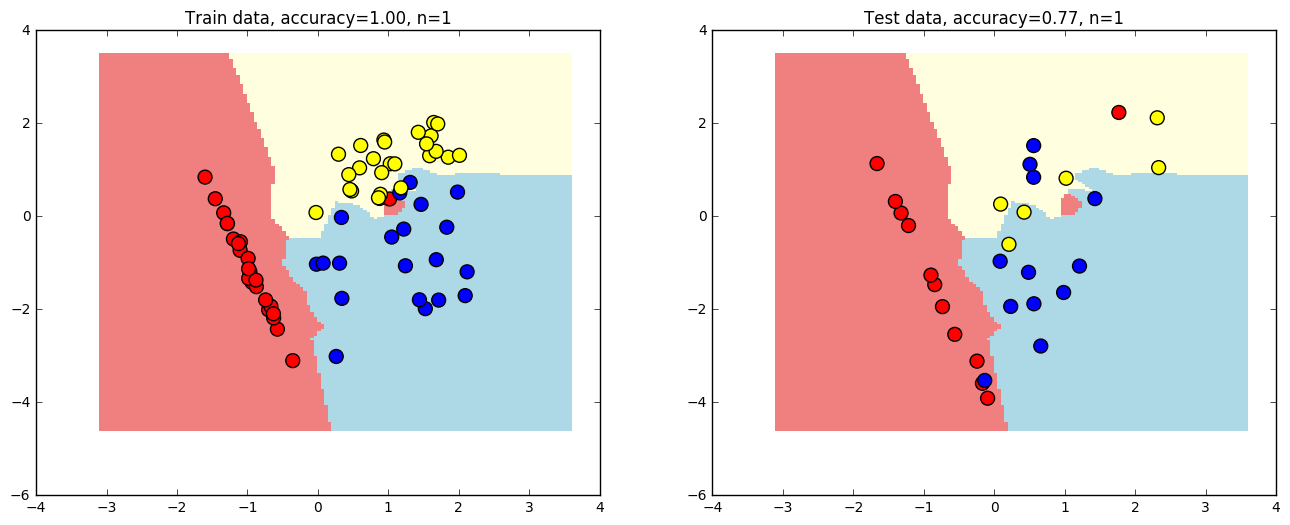

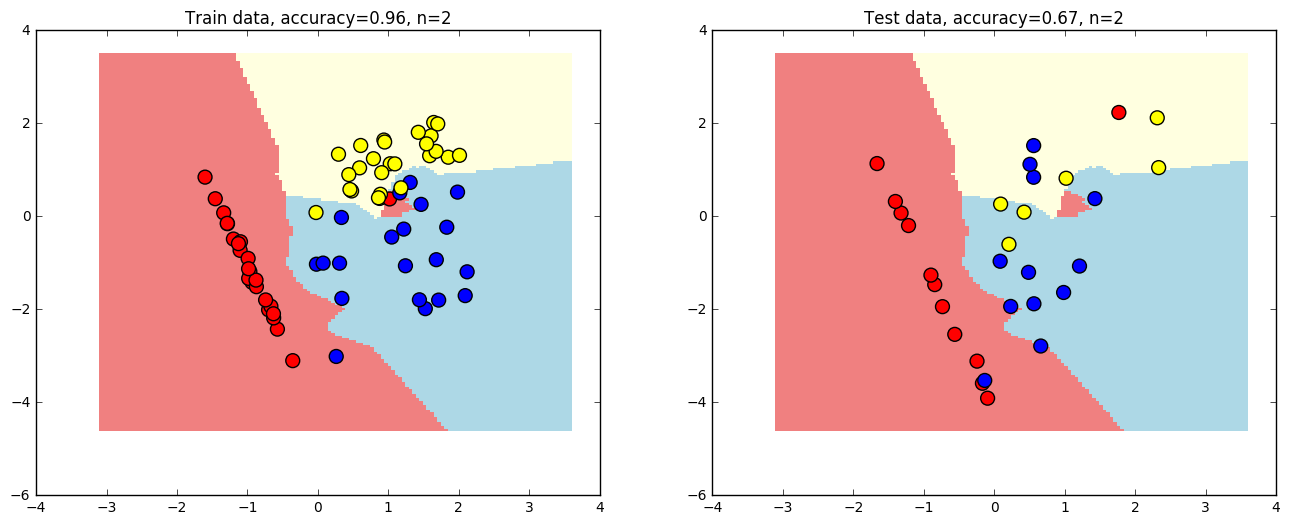

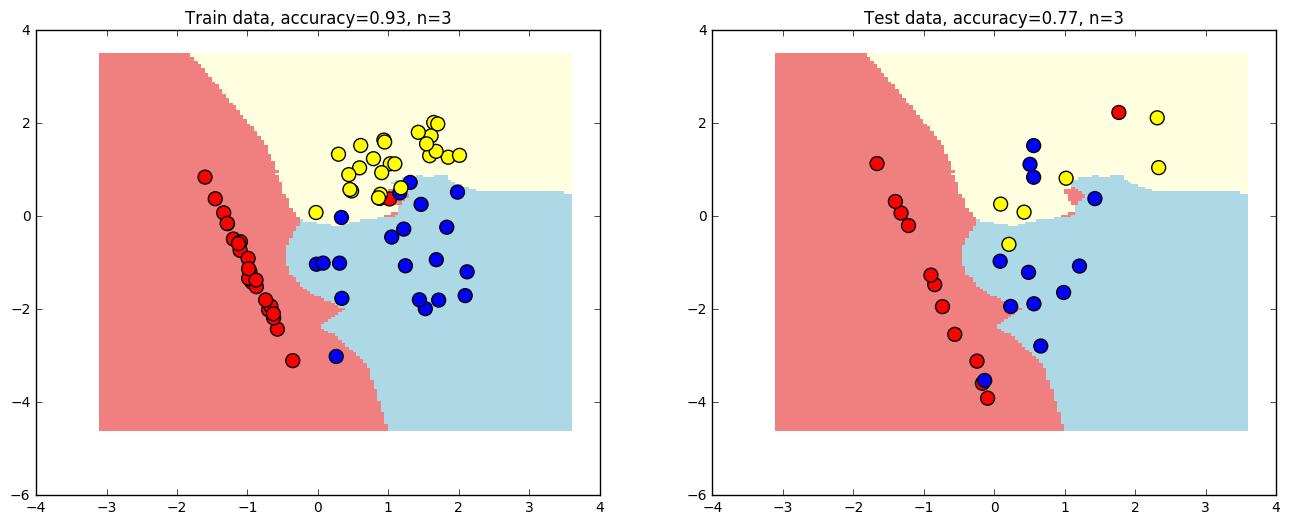

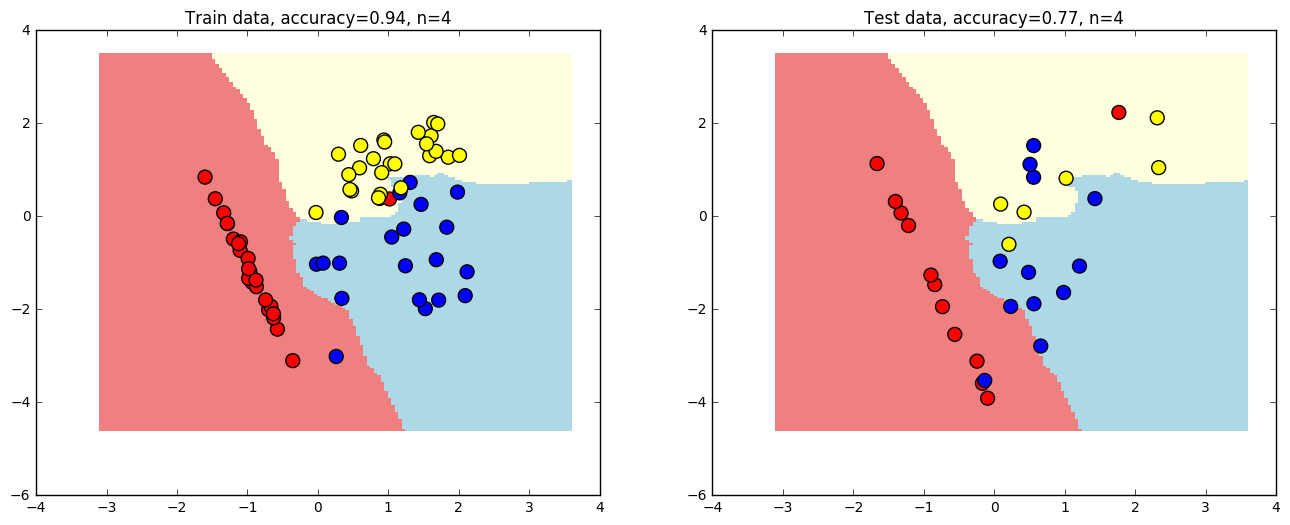

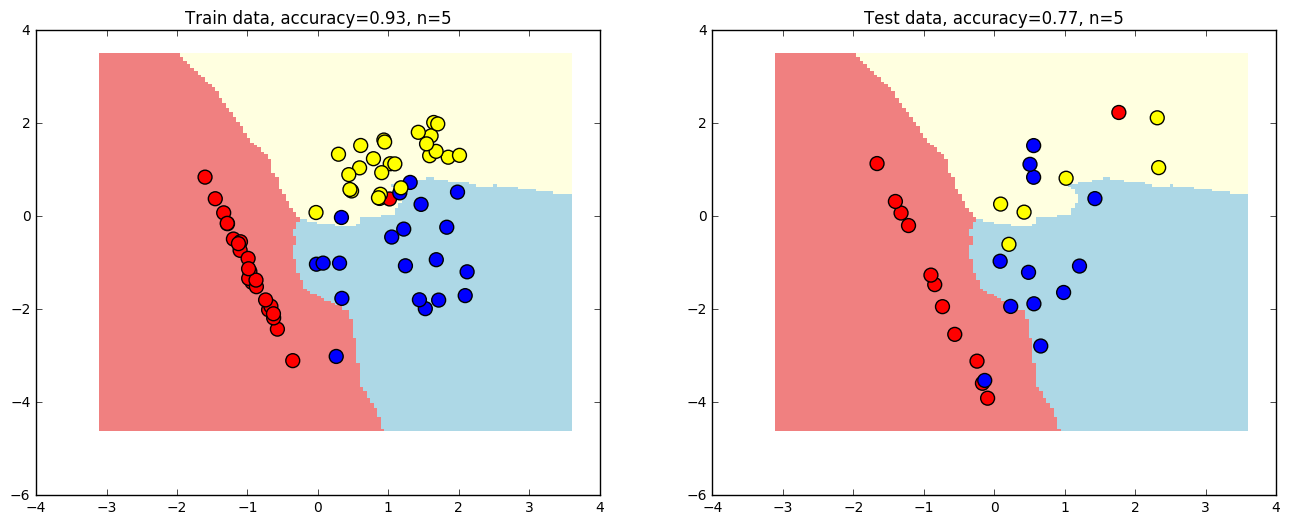

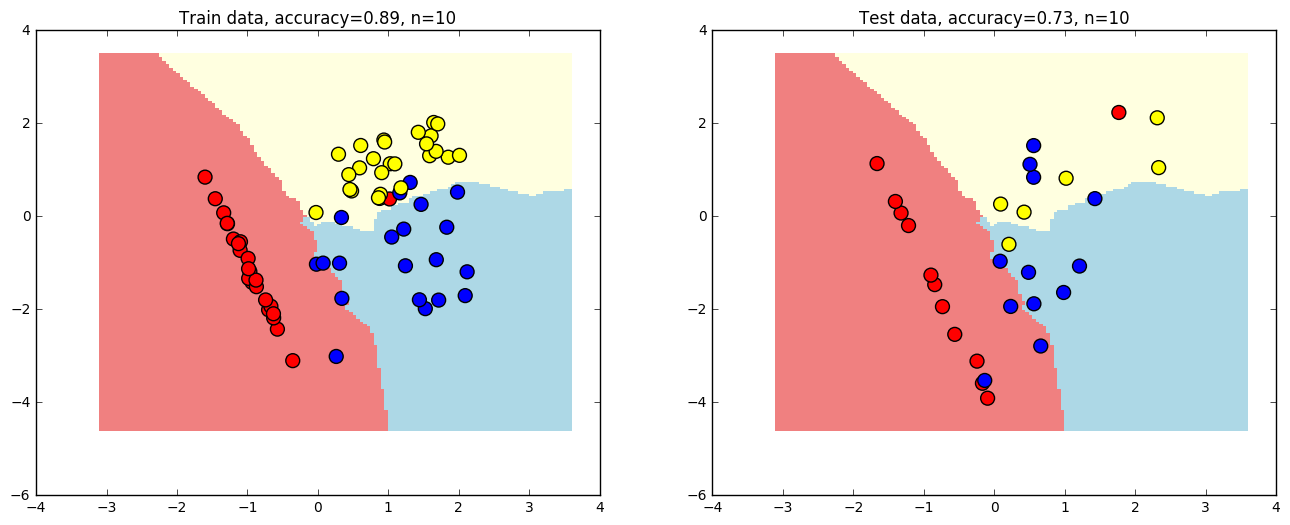

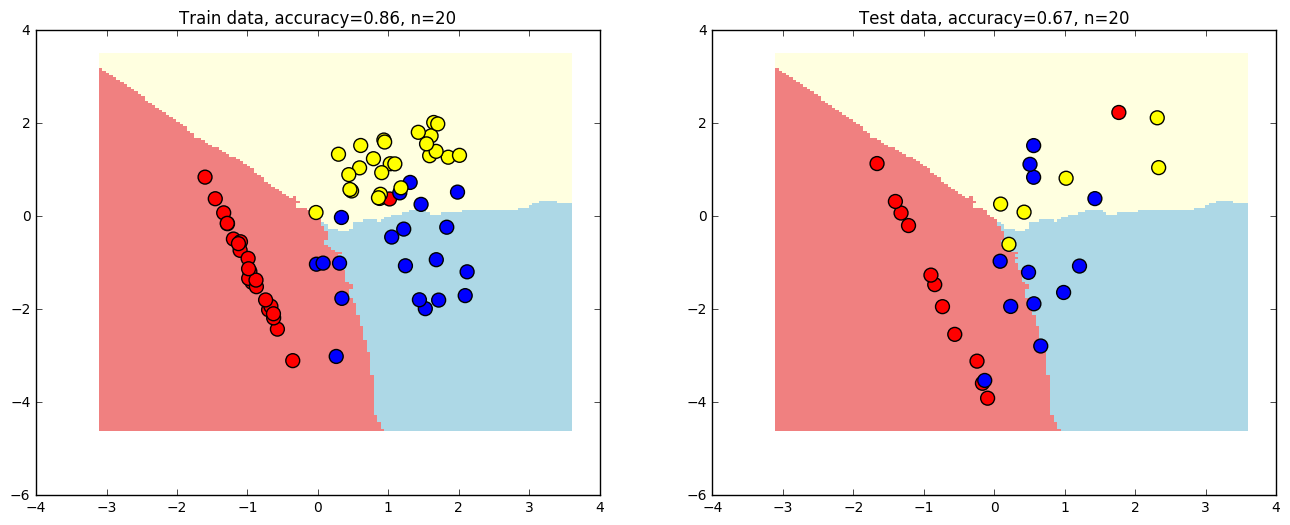

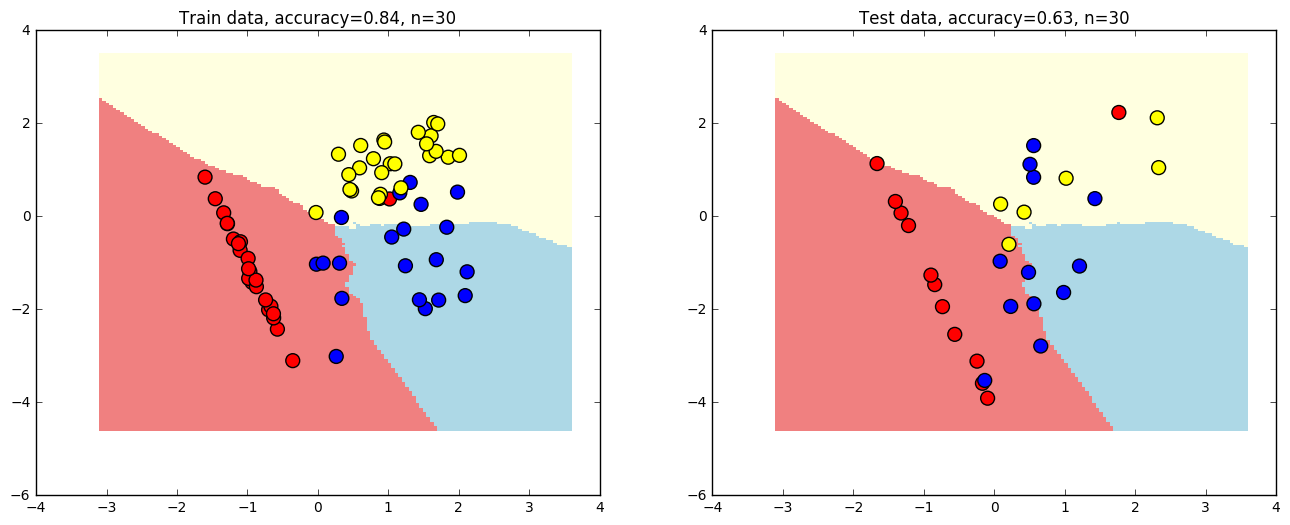

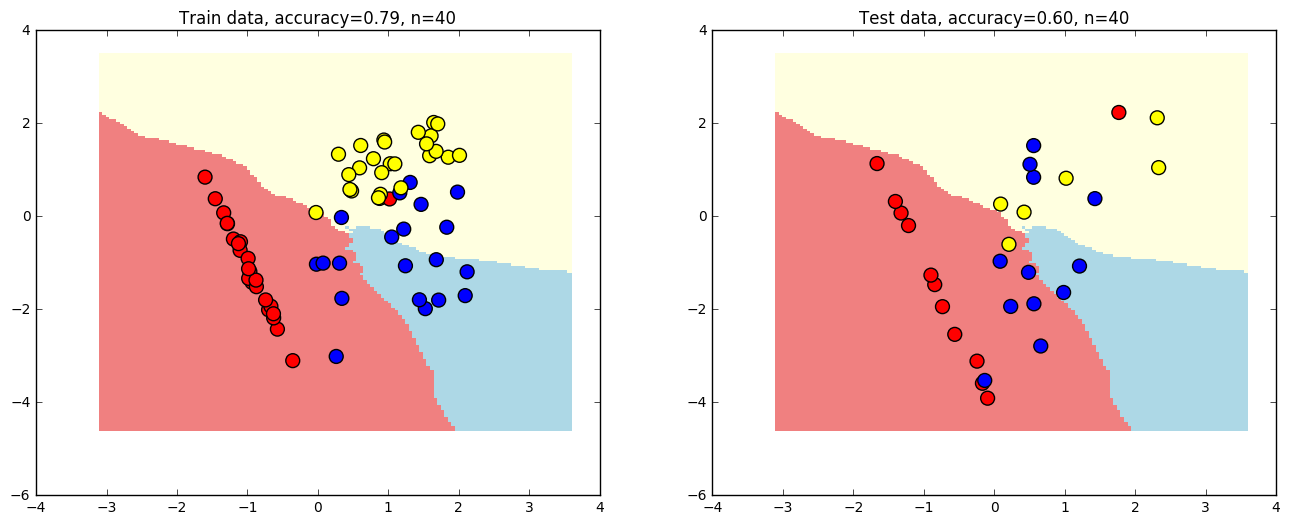

In [70]:
for qty in [1, 2, 3, 4, 5, 10, 20, 30, 40]:
    estimator = neighbors.KNeighborsClassifier(n_neighbors=qty)
    plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels, qty)

In [92]:
cv = KFold(n_splits=5)
X, Y = dataset
accuracies = []
for k in range(1, 81):
    clf = neighbors.KNeighborsClassifier(n_neighbors=k)
    accuracies.append(cross_val_score(clf, X, Y, cv=kf).mean())

In [93]:
np.array(accuracies).argmax()

3

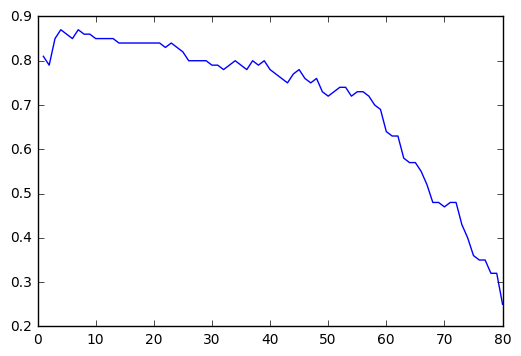

In [94]:
plt.plot(range(1, 81), accuracies)